<a href="https://colab.research.google.com/github/mindyng/ML-Keeping-it-FRESH/blob/master/ML_DL_Basics_Exercisesipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Manual Gradient Descent

w= 0.0
	 1.0 2.0 0.0 4.0
	 2.0 4.0 0.0 16.0
	 3.0 6.0 0.0 36.0
MSE= 18.666666666666668
w= 0.1
	 1.0 2.0 0.1 3.61
	 2.0 4.0 0.2 14.44
	 3.0 6.0 0.30000000000000004 32.49
MSE= 16.846666666666668
w= 0.2
	 1.0 2.0 0.2 3.24
	 2.0 4.0 0.4 12.96
	 3.0 6.0 0.6000000000000001 29.160000000000004
MSE= 15.120000000000003
w= 0.30000000000000004
	 1.0 2.0 0.30000000000000004 2.8899999999999997
	 2.0 4.0 0.6000000000000001 11.559999999999999
	 3.0 6.0 0.9000000000000001 26.009999999999998
MSE= 13.486666666666665
w= 0.4
	 1.0 2.0 0.4 2.5600000000000005
	 2.0 4.0 0.8 10.240000000000002
	 3.0 6.0 1.2000000000000002 23.04
MSE= 11.946666666666667
w= 0.5
	 1.0 2.0 0.5 2.25
	 2.0 4.0 1.0 9.0
	 3.0 6.0 1.5 20.25
MSE= 10.5
w= 0.6000000000000001
	 1.0 2.0 0.6000000000000001 1.9599999999999997
	 2.0 4.0 1.2000000000000002 7.839999999999999
	 3.0 6.0 1.8000000000000003 17.639999999999993
MSE= 9.146666666666663
w= 0.7000000000000001
	 1.0 2.0 0.7000000000000001 1.6899999999999995
	 2.0 4.0 1.4000000000000001 6.75

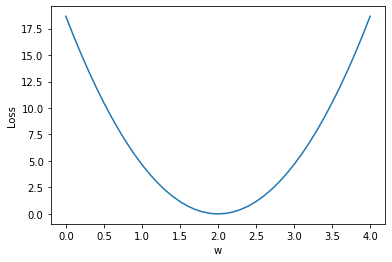

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]


# our model for the forward pass
def forward(x):
    return x * w


# Loss function
def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y) * (y_pred - y)

# List of weights/Mean square Error (MSE) for each input
w_list = []
mse_list = []

for w in np.arange(0.0, 4.1, 0.1):
    # Print the weights and initialize the loss
    print("w=", w)
    l_sum = 0

    for x_val, y_val in zip(x_data, y_data):
        # For each input and output, calculate y_hat
        # Compute the total loss and add to the total error
        y_pred_val = forward(x_val)
        l = loss(x_val, y_val)
        l_sum += l
        print("\t", x_val, y_val, y_pred_val, l)
    # Now compute the Mean squared error (mse) of each
    # Aggregate the weight/mse from this run
    print("MSE=", l_sum / 3)
    w_list.append(w)
    mse_list.append(l_sum / 3)

# Plot it all
plt.plot(w_list, mse_list)
plt.ylabel('Loss')
plt.xlabel('w')
plt.show()



```
# This is formatted as code
```

## Auto Gradient Descent

In [ ]:
import torch
import pdb

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]
w = torch.tensor([1.0], requires_grad=True)

# our model forward pass
def forward(x):
    return x * w

# Loss function
def loss(y_pred, y_val):
    return (y_pred - y_val) ** 2

# Before training
print("Prediction (before training)",  4, forward(4).item())

# Training loop
for epoch in range(10):
    for x_val, y_val in zip(x_data, y_data):
        y_pred = forward(x_val) # 1) Forward pass
        l = loss(y_pred, y_val) # 2) Compute loss
        l.backward() # 3) Back propagation to update weights
        print("\tgrad: ", x_val, y_val, w.grad.item())
        w.data = w.data - 0.01 * w.grad.item()

        # Manually zero the gradients after updating weights
        w.grad.data.zero_()

    print(f"Epoch: {epoch} | Loss: {l.item()}")

# After training
print("Prediction (after training)",  4, forward(4).item())

Prediction (before training) 4 4.0
	grad:  1.0 2.0 -2.0
	grad:  2.0 4.0 -7.840000152587891
	grad:  3.0 6.0 -16.228801727294922
Epoch: 0 | Loss: 7.315943717956543
	grad:  1.0 2.0 -1.478623867034912
	grad:  2.0 4.0 -5.796205520629883
	grad:  3.0 6.0 -11.998146057128906
Epoch: 1 | Loss: 3.9987640380859375
	grad:  1.0 2.0 -1.0931644439697266
	grad:  2.0 4.0 -4.285204887390137
	grad:  3.0 6.0 -8.870372772216797
Epoch: 2 | Loss: 2.1856532096862793
	grad:  1.0 2.0 -0.8081896305084229
	grad:  2.0 4.0 -3.1681032180786133
	grad:  3.0 6.0 -6.557973861694336
Epoch: 3 | Loss: 1.1946394443511963
	grad:  1.0 2.0 -0.5975041389465332
	grad:  2.0 4.0 -2.3422164916992188
	grad:  3.0 6.0 -4.848389625549316
Epoch: 4 | Loss: 0.6529689431190491
	grad:  1.0 2.0 -0.4417421817779541
	grad:  2.0 4.0 -1.7316293716430664
	grad:  3.0 6.0 -3.58447265625
Epoch: 5 | Loss: 0.35690122842788696
	grad:  1.0 2.0 -0.3265852928161621
	grad:  2.0 4.0 -1.2802143096923828
	grad:  3.0 6.0 -2.650045394897461
Epoch: 6 | Loss: 0.19

## Pytorch-built Linear Regression

In [ ]:
from torch import nn
import torch
from torch import tensor

x_data = tensor([[1.0], [2.0], [3.0]])
y_data = tensor([[2.0], [4.0], [6.0]])


class Model(nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate two nn.Linear module
        """
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(1, 1)  # One in and one out

    def forward(self, x):
        """
        In the forward function we accept a Variable of input data and we must return
        a Variable of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Variables.
        """
        y_pred = self.linear(x)
        return y_pred


# our model
model = Model()

# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the two
# nn.Linear modules which are members of the model.
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training loop
for epoch in range(500):
    # 1) Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x_data)

    # 2) Compute and print loss
    loss = criterion(y_pred, y_data)
    print(f'Epoch: {epoch} | Loss: {loss.item()} ')

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


# After training
hour_var = tensor([[4.0]])
y_pred = model(hour_var)
print("Prediction (after training)",  4, model(hour_var).data[0][0].item())

Epoch: 0 | Loss: 25.841419219970703 
Epoch: 1 | Loss: 11.512296676635742 
Epoch: 2 | Loss: 5.13325834274292 
Epoch: 3 | Loss: 2.293372631072998 
Epoch: 4 | Loss: 1.0290179252624512 
Epoch: 5 | Loss: 0.46604785323143005 
Epoch: 6 | Loss: 0.2153146117925644 
Epoch: 7 | Loss: 0.10358257591724396 
Epoch: 8 | Loss: 0.053731758147478104 
Epoch: 9 | Loss: 0.03142990916967392 
Epoch: 10 | Loss: 0.021393848583102226 
Epoch: 11 | Loss: 0.016819769516587257 
Epoch: 12 | Loss: 0.014678658917546272 
Epoch: 13 | Loss: 0.013622180558741093 
Epoch: 14 | Loss: 0.013049978762865067 
Epoch: 15 | Loss: 0.012694859877228737 
Epoch: 16 | Loss: 0.012437851168215275 
Epoch: 17 | Loss: 0.012225865386426449 
Epoch: 18 | Loss: 0.012035384774208069 
Epoch: 19 | Loss: 0.01185579877346754 
Epoch: 20 | Loss: 0.011682509444653988 
Epoch: 21 | Loss: 0.01151329930871725 
Epoch: 22 | Loss: 0.011347251012921333 
Epoch: 23 | Loss: 0.011183956637978554 
Epoch: 24 | Loss: 0.011023059487342834 
Epoch: 25 | Loss: 0.0108646294

## Pytorch-built Logistic Regression

In [7]:
from torch import tensor
from torch import nn
from torch import sigmoid
import torch.nn.functional as F
import torch.optim as optim

# Training data and ground truth
x_data = tensor([[1.0], [2.0], [3.0], [4.0]])
y_data = tensor([[0.], [0.], [1.], [1.]])


class Model(nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate nn.Linear module
        """
        super(Model, self).__init__()
        self.linear = nn.Linear(1, 1)  # One in and one out

    def forward(self, x):
        """
        In the forward function we accept a Variable of input data and we must return
        a Variable of output data.
        """
        y_pred = sigmoid(self.linear(x))
        return y_pred


# our model
model = Model()

# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the two
# nn.Linear modules which are members of the model.
criterion = nn.BCELoss(reduction='mean')
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
for epoch in range(1000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x_data)

    # Compute and print loss
    loss = criterion(y_pred, y_data)
    print(f'Epoch {epoch + 1}/1000 | Loss: {loss.item():.4f}')

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# After training
print(f'\nLet\'s predict the hours need to score above 50%\n{"=" * 50}')
hour_var = model(tensor([[1.0]]))
print(f'Prediction after 1 hour of training: {hour_var.item():.4f} | Above 50%: {hour_var.item() > 0.5}')
hour_var = model(tensor([[7.0]]))
print(f'Prediction after 7 hours of training: {hour_var.item():.4f} | Above 50%: { hour_var.item() > 0.5}')

Epoch 1/1000 | Loss: 0.5006
Epoch 2/1000 | Loss: 0.4998
Epoch 3/1000 | Loss: 0.4990
Epoch 4/1000 | Loss: 0.4983
Epoch 5/1000 | Loss: 0.4976
Epoch 6/1000 | Loss: 0.4969
Epoch 7/1000 | Loss: 0.4962
Epoch 8/1000 | Loss: 0.4955
Epoch 9/1000 | Loss: 0.4948
Epoch 10/1000 | Loss: 0.4942
Epoch 11/1000 | Loss: 0.4935
Epoch 12/1000 | Loss: 0.4929
Epoch 13/1000 | Loss: 0.4923
Epoch 14/1000 | Loss: 0.4917
Epoch 15/1000 | Loss: 0.4911
Epoch 16/1000 | Loss: 0.4905
Epoch 17/1000 | Loss: 0.4899
Epoch 18/1000 | Loss: 0.4893
Epoch 19/1000 | Loss: 0.4888
Epoch 20/1000 | Loss: 0.4883
Epoch 21/1000 | Loss: 0.4877
Epoch 22/1000 | Loss: 0.4872
Epoch 23/1000 | Loss: 0.4867
Epoch 24/1000 | Loss: 0.4862
Epoch 25/1000 | Loss: 0.4857
Epoch 26/1000 | Loss: 0.4852
Epoch 27/1000 | Loss: 0.4847
Epoch 28/1000 | Loss: 0.4843
Epoch 29/1000 | Loss: 0.4838
Epoch 30/1000 | Loss: 0.4833
Epoch 31/1000 | Loss: 0.4829
Epoch 32/1000 | Loss: 0.4825
Epoch 33/1000 | Loss: 0.4820
Epoch 34/1000 | Loss: 0.4816
Epoch 35/1000 | Loss: 0